In [1]:
%pip install kaggle

In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
with zipfile.ZipFile(r"C:\Users\Hair\AI_ML_Internship\house-prices-advanced-regression-techniques.zip", 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\Hair\AI_ML_Internship")

In [4]:
import pandas as pd
# load train dataset
df_train=pd.read_csv("train.csv")
# load test dataset
df_test=pd.read_csv("test.csv")
print("Train Dataset \n", df_train.head(10))

Train Dataset 
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    Al

In [5]:
print("............Checking missing values in the training dataset and testing dataset..............")
missing_values=df_train.isnull().sum()
missing_values=missing_values[missing_values>0]
missing_percentage=(missing_values/len(df_train)*100)

missing_df=pd.DataFrame({
    'Missing_Values':missing_values,
    'Missing_Percentage':missing_percentage
})
print(missing_df.sort_values(by='Missing_Values', ascending=False))

# for test dataset
print(".............Checking missing values in the test dataset................")
missing_test=df_test.isnull().sum()
missing_test=missing_test[missing_test>0]
missing_percen=(missing_test/len(df_test)*100)
missing_df_test=pd.DataFrame({
    'Missing_Values':missing_test,
    'Missing_Percentage':missing_percen
})
print(missing_df_test.sort_values(by='Missing_Values', ascending=False))


............Checking missing values in the training dataset and testing dataset..............
              Missing_Values  Missing_Percentage
PoolQC                  1453           99.520548
MiscFeature             1406           96.301370
Alley                   1369           93.767123
Fence                   1179           80.753425
MasVnrType               872           59.726027
FireplaceQu              690           47.260274
LotFrontage              259           17.739726
GarageType                81            5.547945
GarageYrBlt               81            5.547945
GarageFinish              81            5.547945
GarageQual                81            5.547945
GarageCond                81            5.547945
BsmtFinType2              38            2.602740
BsmtExposure              38            2.602740
BsmtFinType1              37            2.534247
BsmtCond                  37            2.534247
BsmtQual                  37            2.534247
MasVnrArea              

In [6]:
# Drop column where missing values percentage is greater than 50%
# drop from training dataset
drop_col_training = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType']
df_train.drop(columns=[col for col in drop_col_training if col in df_train.columns], inplace=True)

# drop column from testing dataset
drop_col_testing = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType']
df_test.drop(columns=[col for col in drop_col_testing if col in df_test.columns], inplace=True)

In [7]:
# handle missing values having percentage less than 50%
garage_cols_train = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_train[garage_cols_train] = df_train[garage_cols_train].fillna('None')

garage_cols_test = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_test[garage_cols_test] = df_test[garage_cols_test].fillna('None')

# filled with mean
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())


# Basement related columns
bsmt_cols_train = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_train[bsmt_cols_train] = df_train[bsmt_cols_train].fillna('None')

bsmt_cols_test = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_test[bsmt_cols_test] = df_test[bsmt_cols_test].fillna('None')



In [8]:
# training dataset
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

# tesing dataset
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

In [9]:
# check after handling missing values
missing_values_train=df_train.isnull().sum()
missing_values_train=missing_values_train[missing_values_train>0]

missing_values_test=df_test.isnull().sum()
missing_values_test=missing_values_test[missing_values_test>0]

print(missing_values_train)
print(missing_values_test)

FireplaceQu    690
dtype: int64
MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


In [10]:
# Handles above missing values
# handle categorial columns
cat_mode_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
                 'KitchenQual', 'Functional', 'SaleType']
for col in cat_mode_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

num_median_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                   'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in num_median_cols:
    df_test[col] = df_test[col].fillna(df_test[col].median())
    

In [11]:
for df in [df_test,df_train]:
    print(df_test.isnull().sum(),df_train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


In [62]:
# Select categorical columns dynamically
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns
final_df = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True),
                      encoded_df.reset_index(drop=True)], axis=1)

print("Final shape after encoding:", final_df.shape)

Final shape after encoding: (1460, 283)


In [84]:
# Select categorical columns dynamically from train
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding using the already fitted encoder
encoded_data_test = encoder.transform(test_df[categorical_cols])

# Convert back to DataFrame
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns
final_test_df = pd.concat(
    [test_df.drop(columns=categorical_cols).reset_index(drop=True),
     encoded_df_test.reset_index(drop=True)],
    axis=1
)

print("Final test shape after encoding:", final_test_df.shape)


Final test shape after encoding: (1459, 282)


In [88]:
print(final_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 282 entries, Id to SaleCondition_Partial
dtypes: float64(256), int64(26)
memory usage: 3.1 MB
None


In [99]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Split features and target
X_train = final_df.drop(columns=["SalePrice"])  # Replace 'SalePrice' with your target column name
y_train = final_df["SalePrice"]

# Step 2: Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 3: Predict on test set
predictions = model.predict(final_test_df)

# Step 4: Save predictions to CSV
import pandas as pd
submission = pd.DataFrame({
    "Id": test_df["Id"],  # Assuming 'Id' column 
    "SalePrice": predictions
})
submission.to_csv("submission.csv", index=False)

print("✅ Predictions saved to submission.csv")


✅ Predictions saved to submission.csv


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Target column
target = "SalePrice"

# 2. Split X and y
X = final_df.drop(columns=[target])
y = final_df[target]

# 3. Train-test split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Validate
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

# 6. Predict on test set
test_predictions = model.predict(final_test_df)  # final_df_test is your encoded test data


Validation RMSE: 28701.763608735866


In [106]:

# Store the IDs before dropping/encoding
test_ids = test_df["Id"]

# Select categorical columns dynamically
categorical_cols_test = test_df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode with the same encoder from training
encoded_test_data = encoder.transform(test_df[categorical_cols_test])

# Convert to DataFrame
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_cols_test))

# Combine with numerical columns
final_df_test = pd.concat(
    [test_df.drop(columns=categorical_cols_test).reset_index(drop=True),
     encoded_test_df.reset_index(drop=True)],
    axis=1
)

# Predict on test set
test_preds = model.predict(final_df_test)

# Save predictions
output = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})
output.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")


Submission file saved as submission.csv


Validation RMSE: 28741.25
Validation MAE: 17556.16


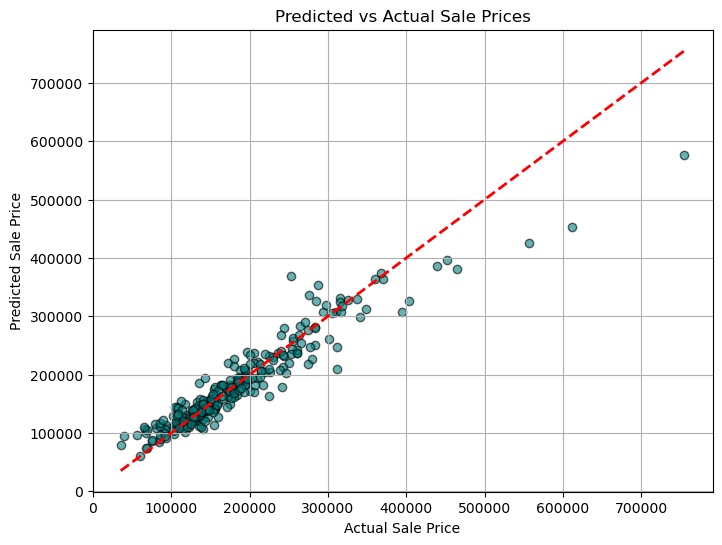

✅ submission.csv created!


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# ==== 1. Load train & test data ====
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# ==== 2. Separate target ====
y = train_df["SalePrice"]
X = train_df.drop(columns=["SalePrice", "Id"])
test_ids = test_df["Id"]
X_test = test_df.drop(columns=["Id"])

# ==== 4. Train-validation split for evaluation ====
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

# ==== 5. Train the model ====
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X_train, y_train)

# ==== 6. Local evaluation ====
val_preds = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")

# ==== 7. Visualization ====
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_preds, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual Sale Prices")
plt.grid(True)
plt.show()

# ==== 8. Train on full data ====
model.fit(X_final, y)

# ==== 9. Predict on test set ====
test_preds = model.predict(X_test_final)

# ==== 10. Create submission file ====
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)

print("✅ submission.csv created!")
